# Machine Learning 301

## Artificial Neural Networks

* İnsan beyinin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarındandır.
* Amaç en küçük hata ile tahmin yapablicek katsayılara erişmektir.

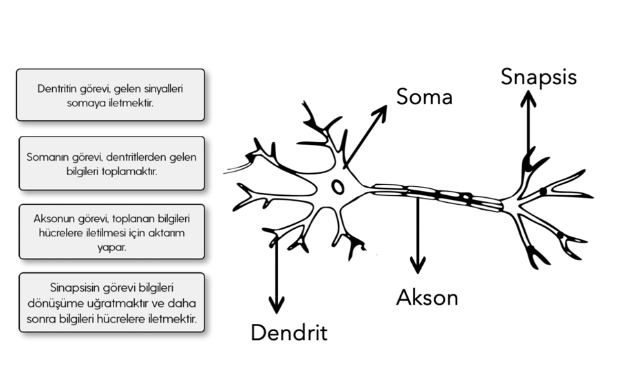

* Yapay Sinir Hücresinin İşleme Prensibi 

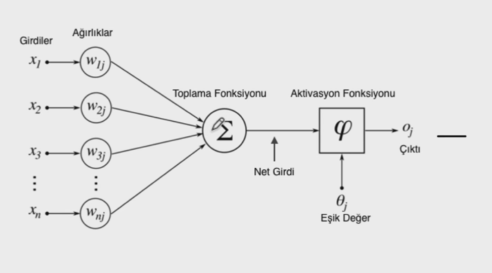

* Girdiler bağımsız değişkenin değerleri.
* Ağırlıklar ise katsayılardır.

* Çok katmanlı yapay sinir ağları :

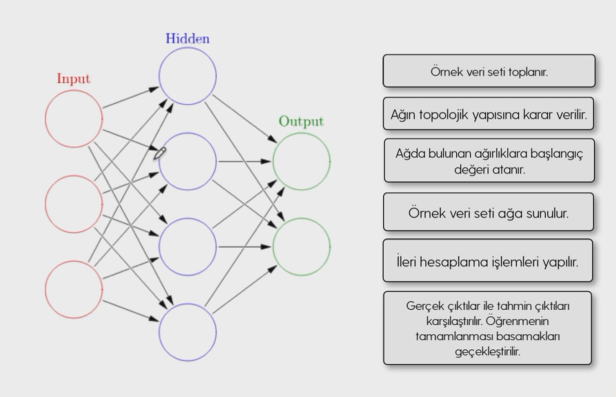

### Model ve Tahmin 

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [28]:
from warnings import filterwarnings
filterwarnings("ignore") 

# önceki bölümlerde alınan uyarı mesajlarını ignore eder

In [29]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [30]:
# YAPAY SİNİR AĞLARI HOMOJEN VERİ SETLERİNDE DAHA İYİ ÇALIŞTIĞI İÇİN VERİLERİ STANDARTLAŞTIRACAĞIZ.

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train) # train seti standartlaştırlır
X_train_scaled = scaler.transform(X_train) # ölçeklendirildi

In [33]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test) # ölçeklendirildi

In [34]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [35]:
mlp_model # regresoyon problemi olduğu için activasyon relu olarak seçilmiş

MLPRegressor()

In [36]:
mlp_model.predict(X_test_scaled)[0:5]

array([25.90975242, 36.21910102, 79.79708957,  7.08950602, 28.25343502])

In [37]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred)) # ilkel test hatası

656.2606110998482

### Model Tuning 

In [38]:
mlp_model # hiç bir parametre değeriyle oynanamamış model

MLPRegressor()

In [39]:
mlp_params = {"alpha" : [0.1, 0.01, 0.02, 0.001, 0.0001],
             "hidden_layer_sizes" : [(10,20), (5,5), (100,100)]}
# alphalar ceza katsayılarıdır
# hidden_layer_sizes gizli katman sayısıdır
# girilen sayı kadar gizli katman oluşturur 10 ve 20 iki sayı var
# ve bu katmanlardakı nöron sayılarında da 10 ve 20 olarak ayarlıyor

In [40]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [41]:
mlp_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}

In [42]:
# final modeli

In [46]:
mlp_tuned = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [47]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

353.3888346317468